In [1]:
import pandas as pd
import cv2
from PIL import Image
import numpy as np
import os
import json
from matplotlib import pyplot as plt

In [4]:
DIR_TRAIN = r'..\data\train'

In [2]:
df = pd.read_csv('coord_objs.csv')

In [3]:
df

,name_file,width,height,class,label,points
0,023.jpg,640,512,2,c_kefir,"[[339, 185], [341, 182], [342, 177], [346, 174..."
1,023.jpg,640,512,2,c_kefir,"[[460, 346], [462, 342], [460, 336], [459, 331..."
2,023.jpg,640,512,2,c_kefir,"[[235, 410], [234, 404], [236, 400], [239, 399..."
3,001.jpg,640,512,2,c_kefir,"[[307, 228], [311, 226], [313, 223], [316, 220..."
4,003.jpg,640,512,2,c_kefir,"[[20, 76], [20, 70], [26, 68], [31, 67], [36, ..."
...,...,...,...,...,...,...
2711,261.jpg,640,512,8,staphylococcus_epidermidis,"[[200, 0], [202, 0], [200, 0], [199, 0], [200,..."
2712,261.jpg,640,512,8,staphylococcus_epidermidis,"[[407, 157], [411, 156], [411, 154], [410, 152..."
2713,261.jpg,640,512,8,staphylococcus_epidermidis,"[[623, 263], [618, 258], [618, 255], [616, 255..."
2714,261.jpg,640,512,8,staphylococcus_epidermidis,"[[110, 344], [110, 341], [108, 335], [105, 333..."


In [66]:
list_imgfile = df['name_file'].unique()

In [71]:
for imgfile in list_imgfile:
    df_img  = df[df['name_file'] == imgfile].reset_index(drop=True)
    row = df_img.loc[0]
    png_file = os.path.splitext(row['name_file'])[0]+'.png'
    
    img = cv2.imread(os.path.join(DIR_TRAIN, png_file))
    height_img, width_img, _ = img.shape    
    
    height_frame = row['height']
    width_frame = row['width']
    
    if (height_img == height_frame) and (width_img == width_frame):
        print(True)
    else:
        print(False)
        break
    mask_img = np.zeros((height_frame, width_frame), np.int16)
    
    
    for id_row, row in df_img.iterrows():               
        points = json.loads(row['points'])
        cv2.fillPoly(mask_img,[np.array(points, np.int32)],(255,255,255))
        
    save_pngfile = os.path.join(DIR_TRAIN, f"mask_{png_file}") 
    print(png_file, 'to', save_pngfile)
    cv2.imwrite(save_pngfile, mask_img)            

True
023.png to ..\data\train\mask_023.png
True
001.png to ..\data\train\mask_001.png
True
003.png to ..\data\train\mask_003.png
True
006.png to ..\data\train\mask_006.png
True
007.png to ..\data\train\mask_007.png
True
008.png to ..\data\train\mask_008.png
True
010.png to ..\data\train\mask_010.png
True
014.png to ..\data\train\mask_014.png
True
016.png to ..\data\train\mask_016.png
True
017.png to ..\data\train\mask_017.png
True
022.png to ..\data\train\mask_022.png
True
024.png to ..\data\train\mask_024.png
True
025.png to ..\data\train\mask_025.png
True
030.png to ..\data\train\mask_030.png
True
032.png to ..\data\train\mask_032.png
True
033.png to ..\data\train\mask_033.png
True
035.png to ..\data\train\mask_035.png
True
036.png to ..\data\train\mask_036.png
True
038.png to ..\data\train\mask_038.png
True
041.png to ..\data\train\mask_041.png
True
046.png to ..\data\train\mask_046.png
True
047.png to ..\data\train\mask_047.png
True
048.png to ..\data\train\mask_048.png
True
050.pn

True
198.png to ..\data\train\mask_198.png
True
199.png to ..\data\train\mask_199.png
True
200.png to ..\data\train\mask_200.png
True
201.png to ..\data\train\mask_201.png
True
202.png to ..\data\train\mask_202.png
True
203.png to ..\data\train\mask_203.png
True
204.png to ..\data\train\mask_204.png
True
205.png to ..\data\train\mask_205.png
True
206.png to ..\data\train\mask_206.png
True
207.png to ..\data\train\mask_207.png
True
208.png to ..\data\train\mask_208.png
True
209.png to ..\data\train\mask_209.png
True
210.png to ..\data\train\mask_210.png
True
211.png to ..\data\train\mask_211.png
True
212.png to ..\data\train\mask_212.png
True
213.png to ..\data\train\mask_213.png
True
214.png to ..\data\train\mask_214.png
True
215.png to ..\data\train\mask_215.png
True
216.png to ..\data\train\mask_216.png
True
217.png to ..\data\train\mask_217.png
True
218.png to ..\data\train\mask_218.png
True
219.png to ..\data\train\mask_219.png
True
220.png to ..\data\train\mask_220.png
True
221.pn

In [54]:
row = df.loc[1]

d:\program files\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


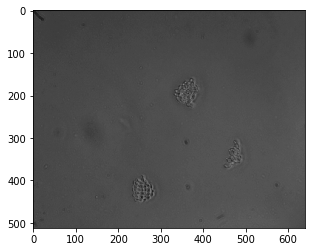

In [61]:
row['name_file'] = os.path.splitext(row['name_file'])[0]+'.png'
points = json.loads(row['points'])
img = cv2.imread(os.path.join(DIR_TRAIN, row['name_file']))
# img = img[:,:,::-1]
plt.imshow(img)

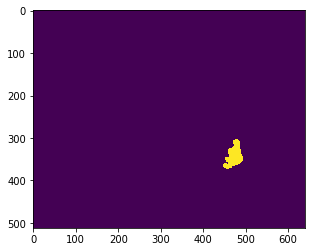

In [62]:
height_frame, width_frame, _ = img.shape
black_img = np.zeros((height_frame, width_frame))
pts = np.array(points, np.int32)
cv2.fillPoly(black_img,[pts],(255,255,255))
plt.imshow(black_img)

# Separable to class

In [105]:
import shutil

In [72]:
DIR_TRAIN = r'..\data\train'

In [73]:
df = pd.read_csv('coord_objs.csv')

In [74]:
df

,name_file,width,height,class,label,points
0,023.jpg,640,512,2,c_kefir,"[[339, 185], [341, 182], [342, 177], [346, 174..."
1,023.jpg,640,512,2,c_kefir,"[[460, 346], [462, 342], [460, 336], [459, 331..."
2,023.jpg,640,512,2,c_kefir,"[[235, 410], [234, 404], [236, 400], [239, 399..."
3,001.jpg,640,512,2,c_kefir,"[[307, 228], [311, 226], [313, 223], [316, 220..."
4,003.jpg,640,512,2,c_kefir,"[[20, 76], [20, 70], [26, 68], [31, 67], [36, ..."
...,...,...,...,...,...,...
2711,261.jpg,640,512,8,staphylococcus_epidermidis,"[[200, 0], [202, 0], [200, 0], [199, 0], [200,..."
2712,261.jpg,640,512,8,staphylococcus_epidermidis,"[[407, 157], [411, 156], [411, 154], [410, 152..."
2713,261.jpg,640,512,8,staphylococcus_epidermidis,"[[623, 263], [618, 258], [618, 255], [616, 255..."
2714,261.jpg,640,512,8,staphylococcus_epidermidis,"[[110, 344], [110, 341], [108, 335], [105, 333..."


In [75]:
class_names = df['label'].unique()

In [76]:
class_names

array(['c_kefir', 'ent_cloacae', 'klebsiella_pneumoniae',
       'moraxella_catarrhalis', 'staphylococcus_aureus',
       'staphylococcus_epidermidis'], dtype=object)

In [109]:
for class_name in class_names:
    list_files = df[df['label'] == class_name]['name_file'].unique()
    
    class_dir = os.path.join(DIR_TRAIN, class_name)
    if not(os.path.isdir(class_dir)):
        os.mkdir(class_dir)
    
    for name_file in list_files:
        name_file = os.path.splitext(name_file)[0]+'.png'
        
        path_file = os.path.join(DIR_TRAIN, name_file)
        cpath_file = os.path.join(class_dir, name_file)
        shutil.copy2(path_file, cpath_file)
        print(path_file, 'to', cpath_file)
        
        path_file = os.path.join(DIR_TRAIN, f"mask_{name_file}")
        cpath_file = os.path.join(class_dir, f"mask_{name_file}")
        shutil.copy2(path_file, cpath_file)
        print(path_file, 'to', cpath_file)
    print(class_name)
    

..\data\train\023.png to ..\data\train\c_kefir\023.png
..\data\train\mask_023.png to ..\data\train\c_kefir\mask_023.png
..\data\train\001.png to ..\data\train\c_kefir\001.png
..\data\train\mask_001.png to ..\data\train\c_kefir\mask_001.png
..\data\train\003.png to ..\data\train\c_kefir\003.png
..\data\train\mask_003.png to ..\data\train\c_kefir\mask_003.png
..\data\train\006.png to ..\data\train\c_kefir\006.png
..\data\train\mask_006.png to ..\data\train\c_kefir\mask_006.png
..\data\train\007.png to ..\data\train\c_kefir\007.png
..\data\train\mask_007.png to ..\data\train\c_kefir\mask_007.png
..\data\train\008.png to ..\data\train\c_kefir\008.png
..\data\train\mask_008.png to ..\data\train\c_kefir\mask_008.png
..\data\train\010.png to ..\data\train\c_kefir\010.png
..\data\train\mask_010.png to ..\data\train\c_kefir\mask_010.png
..\data\train\014.png to ..\data\train\c_kefir\014.png
..\data\train\mask_014.png to ..\data\train\c_kefir\mask_014.png
..\data\train\016.png to ..\data\train\c

..\data\train\070.png to ..\data\train\c_kefir\070.png
..\data\train\mask_070.png to ..\data\train\c_kefir\mask_070.png
c_kefir
..\data\train\071.png to ..\data\train\ent_cloacae\071.png
..\data\train\mask_071.png to ..\data\train\ent_cloacae\mask_071.png
..\data\train\072.png to ..\data\train\ent_cloacae\072.png
..\data\train\mask_072.png to ..\data\train\ent_cloacae\mask_072.png
..\data\train\073.png to ..\data\train\ent_cloacae\073.png
..\data\train\mask_073.png to ..\data\train\ent_cloacae\mask_073.png
..\data\train\074.png to ..\data\train\ent_cloacae\074.png
..\data\train\mask_074.png to ..\data\train\ent_cloacae\mask_074.png
..\data\train\075.png to ..\data\train\ent_cloacae\075.png
..\data\train\mask_075.png to ..\data\train\ent_cloacae\mask_075.png
..\data\train\076.png to ..\data\train\ent_cloacae\076.png
..\data\train\mask_076.png to ..\data\train\ent_cloacae\mask_076.png
..\data\train\077.png to ..\data\train\ent_cloacae\077.png
..\data\train\mask_077.png to ..\data\train\e

..\data\train\mask_134.png to ..\data\train\ent_cloacae\mask_134.png
..\data\train\135.png to ..\data\train\ent_cloacae\135.png
..\data\train\mask_135.png to ..\data\train\ent_cloacae\mask_135.png
..\data\train\136.png to ..\data\train\ent_cloacae\136.png
..\data\train\mask_136.png to ..\data\train\ent_cloacae\mask_136.png
..\data\train\137.png to ..\data\train\ent_cloacae\137.png
..\data\train\mask_137.png to ..\data\train\ent_cloacae\mask_137.png
..\data\train\138.png to ..\data\train\ent_cloacae\138.png
..\data\train\mask_138.png to ..\data\train\ent_cloacae\mask_138.png
..\data\train\139.png to ..\data\train\ent_cloacae\139.png
..\data\train\mask_139.png to ..\data\train\ent_cloacae\mask_139.png
..\data\train\140.png to ..\data\train\ent_cloacae\140.png
..\data\train\mask_140.png to ..\data\train\ent_cloacae\mask_140.png
..\data\train\141.png to ..\data\train\ent_cloacae\141.png
..\data\train\mask_141.png to ..\data\train\ent_cloacae\mask_141.png
..\data\train\142.png to ..\data\tr

..\data\train\225.png to ..\data\train\staphylococcus_aureus\225.png
..\data\train\mask_225.png to ..\data\train\staphylococcus_aureus\mask_225.png
..\data\train\226.png to ..\data\train\staphylococcus_aureus\226.png
..\data\train\mask_226.png to ..\data\train\staphylococcus_aureus\mask_226.png
..\data\train\227.png to ..\data\train\staphylococcus_aureus\227.png
..\data\train\mask_227.png to ..\data\train\staphylococcus_aureus\mask_227.png
..\data\train\228.png to ..\data\train\staphylococcus_aureus\228.png
..\data\train\mask_228.png to ..\data\train\staphylococcus_aureus\mask_228.png
..\data\train\229.png to ..\data\train\staphylococcus_aureus\229.png
..\data\train\mask_229.png to ..\data\train\staphylococcus_aureus\mask_229.png
..\data\train\230.png to ..\data\train\staphylococcus_aureus\230.png
..\data\train\mask_230.png to ..\data\train\staphylococcus_aureus\mask_230.png
..\data\train\231.png to ..\data\train\staphylococcus_aureus\231.png
..\data\train\mask_231.png to ..\data\train